In [16]:
import math
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy import stats
from functools import partial
%matplotlib inline

### How to create a PDF in Python? Remember we introduced Probabilistic Programming. One of the most popular libraries for this is PYMC3. How to create a PMF in Python? How to create a CDF in Python?

One of the way to create PDF, PMF and CDF in Python is to use scipy.stats package. The value of the PDF at any value of the variate can be obtained using the function pdf of the respective distribution.

In [3]:
# PDF of Gaussian of mean = 0.0 and std. deviation = 1.0 at 0.
stats.norm.pdf(0, loc=0.0, scale=1.0)

0.3989422804014327

In [4]:
## We can also pass an array of values to this function, to get the PDF at the specified values of the variate:
stats.norm.pdf([-0.1, 0.0, 0.1], loc=0.0, scale=1.0)

array([0.39695255, 0.39894228, 0.39695255])

For discrete variates the probability mass function (PMF) gives the probability of the variate having a value x.

In [5]:
stats.norm.cdf(0.0, loc=0.0, scale=1.0)

0.5

### Create a function that converts any list into a PMF.

In [7]:
def sort_series(fnc):
    
    """ Decorator to sort the series of probability based on series index"""
    
    def wrapper(*args, **kwargs):
        prob = fnc(*args, **kwargs)
        prob_series = pd.Series(prob)
        prob_series.sort_index(inplace=True)
        return prob_series
    return wrapper

In [8]:
numbers = [12,10,8,13,15,2,12,8,13,10]
@sort_series
def pmf(numbers):
    """
     Finds the pmf given the list

    @parameter numbers - is a list of values. 
      
    """
    count = Counter(numbers)
    length =len(numbers)
    prob = {key: count[key]/length for key in count}
    #num_prob = dict(count.keys(), prob)
    return prob

Text(0, 0.5, ' probability')

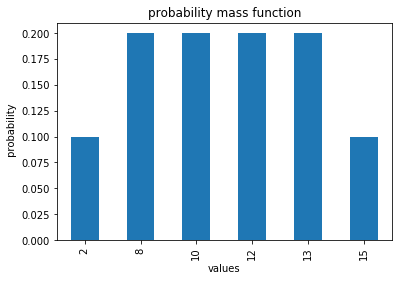

In [9]:
prob_series = (pmf(numbers))
ax=prob_series.plot(kind='bar', title='probability mass function')
ax.set_xlabel("values")
ax.set_ylabel(" probability")

### [Functional Programming] Using the given lambda expression, tabulate the derived CDF at 4 arbitrarily chosen values (you can define them yourself).

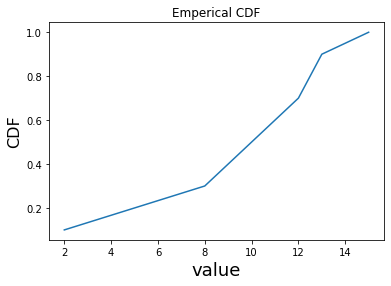

In [11]:
cumulative = np.cumsum(prob_series) # cumulative distribution 

plt.plot([2,8,10,12,13,15], cumulative)
plt.title('Emperical CDF')
plt.xlabel('value', fontsize=18)
plt.ylabel('CDF', fontsize=16)
plt.show()

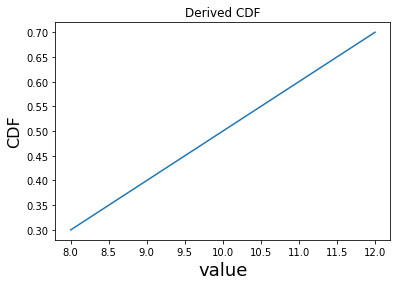

In [12]:
f = lambda x: np.interp(x, [8,10,12] ,[.30000000000000004, 0.5, 0.7]) ## deriving the cdf 
derived_cdf = f([8,9,10,11,12] )
plt.plot([8,9,10,11,12], derived_cdf)
plt.title('Derived CDF')
plt.xlabel('value', fontsize=18)
plt.ylabel('CDF', fontsize=16)
plt.show()

### Percentiles

In [14]:
def percentile(N, percent, key=lambda x:x): 

    """ 

    Find the percentile of a list of values. 

 

    @parameter N - is a list of values. Note N MUST BE already sorted. 

    @parameter percent - a float value from 0.0 to 1.0. 

    @parameter key - optional key function to compute value from each element of N. 

 

    @return - the percentile of the values 

    """ 

    if N is None: 

        return None 

    k = (len(N)-1) * percent 

    f = math.floor(k) 

    c = math.ceil(k) 

    if f == c: 

        return key(N[int(k)]) 

    d0 = key(N[int(f)]) * (c-k) 

    d1 = key(N[int(c)]) * (k-f) 

    return d0+d1

In [17]:
percentile([8,9,10,11,12], .9)

11.6

### [Functional Programming] Define a partial function that always find the 25% of a given array (first quartile). Use the percentile function definition given below

In [18]:
first_quantile = partial(percentile, percent = .25 )
first_quantile([1, 3, 3, 4, 5, 8, 8])

3.0